In [ ]:
import pandas as pd  
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/punti-somministrazione-latest.csv')
df

,area,provincia,comune,presidio_ospedaliero,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,ABR,CHIETI,CHIETI,PRESIDIO OSPEDALIERO SS ANNUNZIATA,ITF,ITF1,13,Abruzzo
1,ABR,CHIETI,LANCIANO,PRESIDIO OSPEDALIERO RENZETTI,ITF,ITF1,13,Abruzzo
2,ABR,CHIETI,VASTO,PRESIDIO OSPEDALIERO SAN PIO,ITF,ITF1,13,Abruzzo
3,ABR,L'AQUILA,AVEZZANO,P.O. SS. FILIPPO E NICOLA,ITF,ITF1,13,Abruzzo
4,ABR,L'AQUILA,L'AQUILA,PRESIDIO OSPEDALIERO SAN SALVATORE,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...
288,VEN,ROVIGO,ROVIGO,"OSPEDALE ""SANTA MARIA DELLA MISERICORDIA""",ITH,ITH3,5,Veneto
289,VEN,TREVISO,VITTORIO VENETO,OSPEDALE DI VITTORIO VENETO,ITH,ITH3,5,Veneto
290,VEN,VENEZIA,VENEZIA MESTRE,OSPEDALE DELL'ANGELO,ITH,ITH3,5,Veneto
291,VEN,VERONA,VERONA,AZIENDA OSPEDALIERA UNIVERSITARIA INTEGRATA DI...,ITH,ITH3,5,Veneto


1. Eliminare tutte le colonne ad eccezione della provincia, del comune, del presidio ospedaliero e del
nome_area

In [ ]:
df.filter(['provincia','comune','presidio_ospedaliero','nome_area'])

,provincia,comune,presidio_ospedaliero,nome_area
0,CHIETI,CHIETI,PRESIDIO OSPEDALIERO SS ANNUNZIATA,Abruzzo
1,CHIETI,LANCIANO,PRESIDIO OSPEDALIERO RENZETTI,Abruzzo
2,CHIETI,VASTO,PRESIDIO OSPEDALIERO SAN PIO,Abruzzo
3,L'AQUILA,AVEZZANO,P.O. SS. FILIPPO E NICOLA,Abruzzo
4,L'AQUILA,L'AQUILA,PRESIDIO OSPEDALIERO SAN SALVATORE,Abruzzo
...,...,...,...,...
288,ROVIGO,ROVIGO,"OSPEDALE ""SANTA MARIA DELLA MISERICORDIA""",Veneto
289,TREVISO,VITTORIO VENETO,OSPEDALE DI VITTORIO VENETO,Veneto
290,VENEZIA,VENEZIA MESTRE,OSPEDALE DELL'ANGELO,Veneto
291,VERONA,VERONA,AZIENDA OSPEDALIERA UNIVERSITARIA INTEGRATA DI...,Veneto


2. Eliminare i dati nulli

In [ ]:
df.dropna(inplace = True)
df

,area,provincia,comune,presidio_ospedaliero,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,ABR,CHIETI,CHIETI,PRESIDIO OSPEDALIERO SS ANNUNZIATA,ITF,ITF1,13,Abruzzo
1,ABR,CHIETI,LANCIANO,PRESIDIO OSPEDALIERO RENZETTI,ITF,ITF1,13,Abruzzo
2,ABR,CHIETI,VASTO,PRESIDIO OSPEDALIERO SAN PIO,ITF,ITF1,13,Abruzzo
3,ABR,L'AQUILA,AVEZZANO,P.O. SS. FILIPPO E NICOLA,ITF,ITF1,13,Abruzzo
4,ABR,L'AQUILA,L'AQUILA,PRESIDIO OSPEDALIERO SAN SALVATORE,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...
288,VEN,ROVIGO,ROVIGO,"OSPEDALE ""SANTA MARIA DELLA MISERICORDIA""",ITH,ITH3,5,Veneto
289,VEN,TREVISO,VITTORIO VENETO,OSPEDALE DI VITTORIO VENETO,ITH,ITH3,5,Veneto
290,VEN,VENEZIA,VENEZIA MESTRE,OSPEDALE DELL'ANGELO,ITH,ITH3,5,Veneto
291,VEN,VERONA,VERONA,AZIENDA OSPEDALIERA UNIVERSITARIA INTEGRATA DI...,ITH,ITH3,5,Veneto


3. Visualizzare i punti vaccinali di un comune inserito dall’utente. Controllare il dato inserito: se il comune
non esiste dare un opportuno messaggio, altrimenti visualizzare i nomi dei punti vaccinali

4. Visualizzare il numero di punti vaccinali di ogni regione. Visualizzare il nome della regione e il numero di
punti vaccinali. Ordinare in ordine decrescente sul numero di punti vaccinali (dalla regione che ha più
punti vaccinali a quella che ne ha di meno)

In [ ]:
df2 = df.groupby('nome_area')['presidio_ospedaliero'].count().sort_values(ascending = False)
df2

nome_area
Lombardia                             65
Sicilia                               33
Piemonte                              28
Campania                              27
Lazio                                 20
Liguria                               14
Emilia-Romagna                        13
Toscana                               12
Sardegna                              12
Puglia                                11
Veneto                                 7
Abruzzo                                7
Marche                                 7
Provincia Autonoma Bolzano / Bozen     7
Calabria                               6
Friuli-Venezia Giulia                  5
Basilicata                             5
Umbria                                 4
Provincia Autonoma Trento              3
Valle d'Aosta / Vallée d'Aoste         2
Molise                                 2
Name: presidio_ospedaliero, dtype: int64

5. Visualizzare il grafico a barre orizzontali relativo all’esercizio 4. Inserire il titolo, i nomi degli assi e la
legenda. Fare in modo che i colori delle barre siano gradazioni dello stesso colore.

In [ ]:
import seaborn as sns

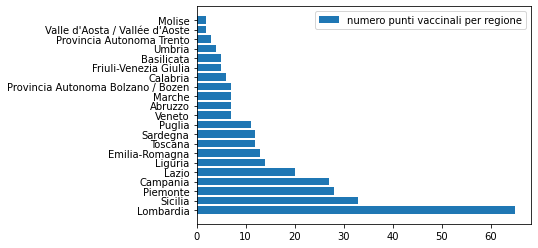

In [ ]:

osp = list(df2.index)
regione = list(df2.values)
fig = plt.figure()
ax = plt.axes()
ax.barh(osp, regione,label = 'numero punti vaccinali per regione')
ax.legend(loc=0)
plt.show()

6. Visualizzare il numero di province per ogni regione

In [ ]:
df2 = df.groupby(["nome_area", "provincia"]).count()
df2.reset_index("provincia", inplace = True)
df2.reset_index("nome_area", inplace = True)
df3 = df2.groupby("nome_area")[["provincia"]].count()
df3

,provincia
nome_area,
Abruzzo,4
Basilicata,2
Calabria,5
Campania,5
Emilia-Romagna,9
Friuli-Venezia Giulia,4
Lazio,6
Liguria,5
Lombardia,12


7.Visualizzare il grafico a torta dei dati dell’esercizio precedente. Inserire il titolo e la legenda

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


array([ 4,  2,  5,  5,  9,  4,  6,  5, 12,  5,  1,  8,  1,  1,  6,  8,  9,
       10,  2,  1,  7])

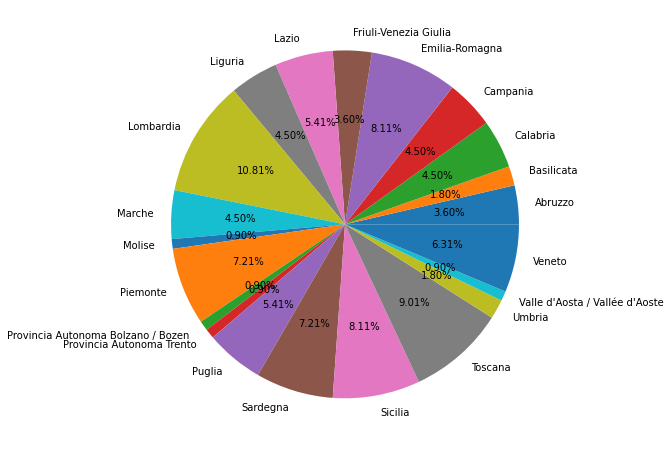

In [ ]:
fig = plt.figure(figsize=[8,8])
ax = plt.axes()

ax.pie(df3.values,labels = df3.index, autopct="%1.2f%%") #grafico a torta

df3['provincia'].values

8.Visualizzare un nuovo grafico con i grafici precedenti. Il nuovo grafico deve avere due righe e tre
colonne e deve contenere nella prima riga tre volte il grafico a barre e nella seconda riga tre volte il
grafico a torta

In [ ]:
plt.savefig("grafico.png")

<Figure size 432x288 with 0 Axes>